<a href="https://colab.research.google.com/github/Utkarsha1a/Car-Price-Pridiction/blob/main/Copy_of_CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
# Computational imports
import numpy as np   # Library for n-dimensional arrays
import pandas as pd  # Library for dataframes (structured data)

# ML imports
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold, TimeSeriesSplit

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# I like to disable my Notebook Warnings.
import warnings
warnings.filterwarnings('ignore')

# Set seeds to make the experiment more reproducible.
from numpy.random import seed
seed(1)

# Allows us to see more information regarding the DataFrame
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

Acquiring data set 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving car data.csv to car data.csv


In [ ]:
car_data = pd.read_csv('car data.csv')

Data Pre Processing

In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


So we have 8 feature columns + 1 target column Selling_Price

In [ ]:
car_data.shape

(301, 9)

301 rows and and 8 feature + 1 target =9 columns present in a dataset

In [ ]:
print(car_data['Seller_Type'].unique())
print(car_data['Fuel_Type'].unique())
print(car_data['Transmission'].unique())
print(car_data['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [ ]:
##check missing values
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

EDA/Visualizations

The goal is to try and gain insights from the data prior to modeling

Explorating the Dataframe
It is useful to use .info() method to quickly have a glance on the general information about the DataFrame. It displays info such as the type of the columnd and also the # of non-null count. In this case there are 301entries and for each coloumn we have 301 non-null count. This means no column has any missing values.

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

The describe() method gives a quick summary of the statistical information of the numerical columns. We get descriptions for the mean, standard deviation and max value for example.

In [ ]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
car_data.describe(include='object').transpose()

,count,unique,top,freq
Car_Name,301,98,city,26
Fuel_Type,301,3,Petrol,239
Seller_Type,301,2,Dealer,195
Transmission,301,2,Manual,261


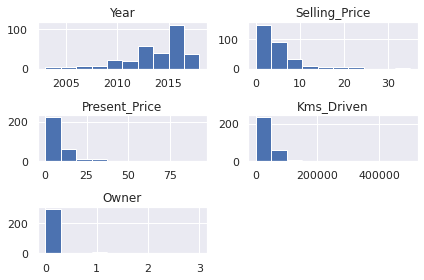

In [ ]:
# plot the histogram of numeric independent variables
car_data.hist()
plt.tight_layout()  # adjust the subplots
plt.show()

Most number of car has been sold within a price range of 1–10 lakh and for a price range of 25 -35 lakh there are negligible amount of customer

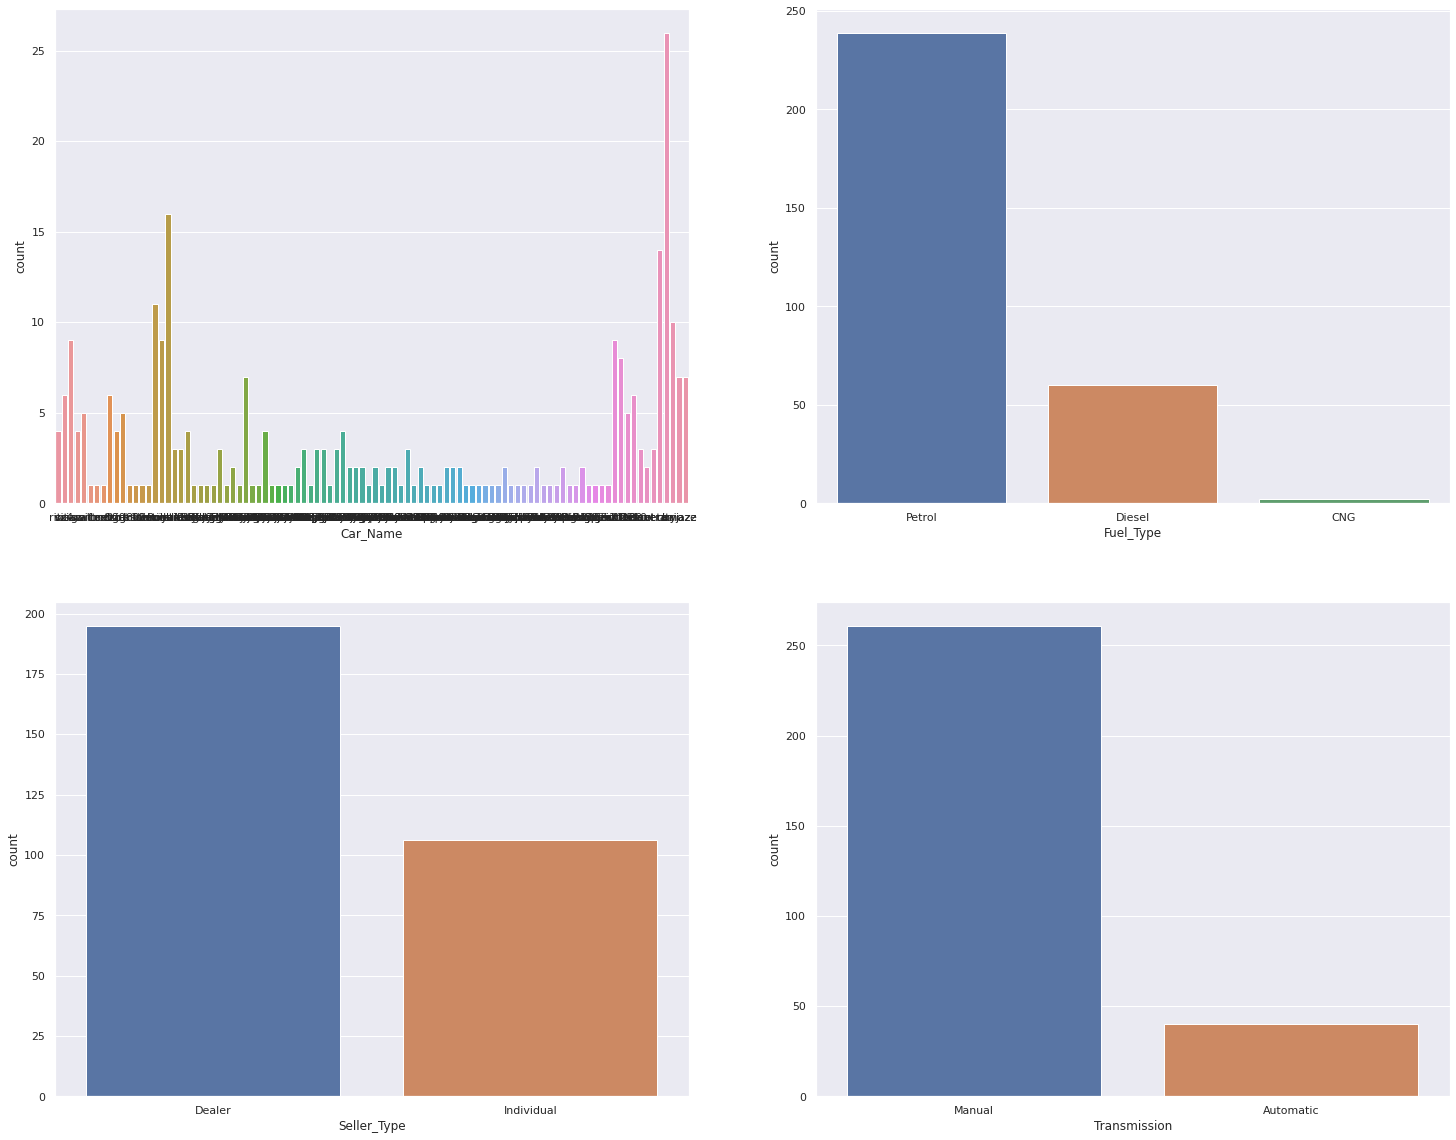

In [ ]:
# import 'is_string_dtype' to check if the type of input is string  
from pandas.api.types import is_string_dtype
categorical=[]

for column in car_data:
    
    # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(car_data[column]):
        categorical.append(column)

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(25, 20))

for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(car_data[variable], ax = subplot)

plt.show()

In [ ]:
for object_col in categorical:
    print(f'{object_col}:{car_data[object_col].nunique()}\n')

Car_Name:98

Fuel_Type:3

Seller_Type:2

Transmission:2



In [ ]:
for object_col in categorical:
    obj_val_counts = car_data[object_col].value_counts()
    print(f'{obj_val_counts}\n')

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
etios g 

Here we have cars of 98 different companies and name of companies won’t affect car’s price ,price depends upon how many year it’s been used ,fuel type etc,.so i will drop the column car_name from original dataframe.

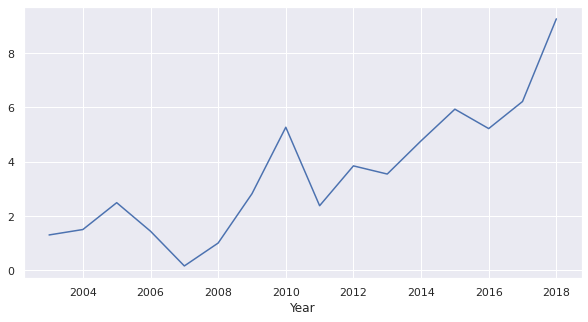

In [ ]:
car_df_grouped_by_year = car_data.groupby(['Year'])['Selling_Price'].mean()
car_df_grouped_by_year.plot(figsize = (10,5))

This plot shows the steady increase of car selling price througout the years. This is expected especially with inflation.


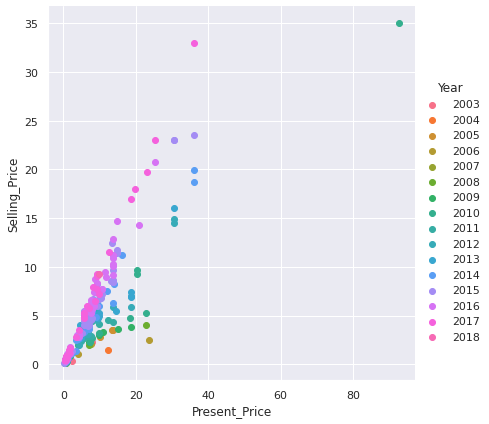

In [ ]:
sns.set_style("darkgrid")
sns.FacetGrid(car_data,hue="Year",height=6).map(plt.scatter,"Present_Price","Selling_Price").add_legend()
plt.show()

More number of Years you will use your car lesser the amount you will get.

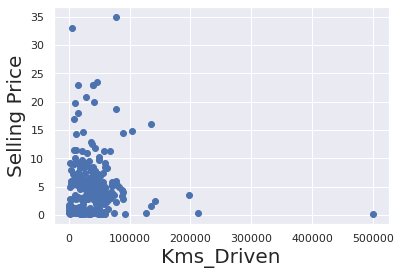

In [ ]:
plt.scatter(car_data["Kms_Driven"],car_data["Selling_Price"])
plt.xlabel("Kms_Driven",fontsize=20)
plt.ylabel("Selling Price",fontsize=20)
plt.show()

Lesser the car would be driven higher will be the cost as we see the graph at max distance i e:- 500000 kilometres the car’s cost is near to Zero means nobody is willing to pay any amount to those cars.

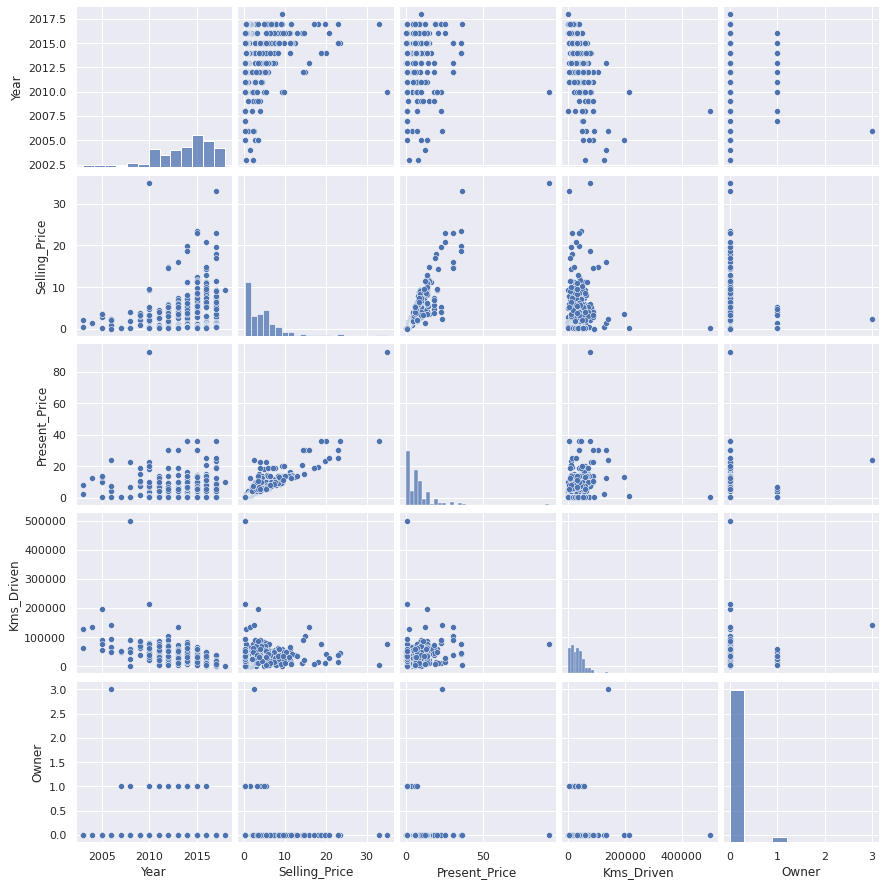

In [ ]:
sns.pairplot(car_data)
plt.show()

As we see there are very less overlapping in dataset is seen so we cannot use knn ,linear regression,svm and because of the dynamic nature of dataset we even cannot use decision tree so we will go with random forest and xgboost.

In [ ]:
import datetime
now = datetime.datetime.now()
car_data["Year_Old"] = now.year - car_data["Year"]
car_data.drop(["Year"],axis=1, inplace=True)

In [ ]:
car_data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year_Old
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


2.493422417797524


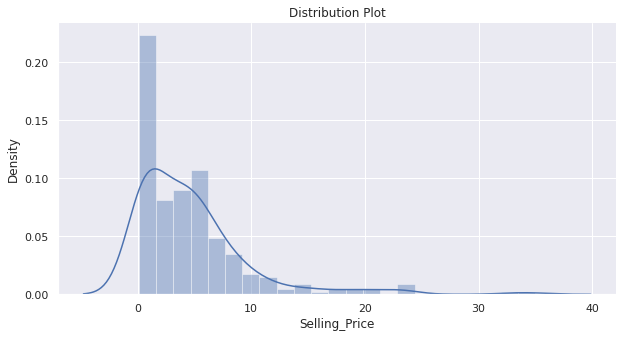

In [ ]:
def dist_plots(df):
    plt.figure(figsize=(10,5))
    plt.title("Distribution Plot")
    sns.distplot(df)
    sns.despine()
    plt.show()

print(car_data['Selling_Price'].skew())
dist_plots(car_data['Selling_Price'])

We notice that the distributiuon is right skewed. 

In [ ]:
"""
Apply a log transformation to the target for better optimization 
during training.
"""
car_data['Selling_Price'] = np.log(car_data['Selling_Price'])


-0.474319246643737


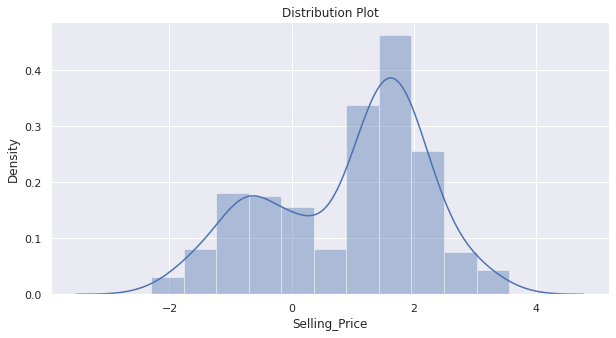

In [ ]:
print(car_data['Selling_Price'].skew())
dist_plots(car_data['Selling_Price'])

Handling Categorical Data
So that the model can understand categorical data, we must transform them in a numerical form. There is various ways to do that.

Some of them categorical data are,

Nominal Data --> data are not in any order --> OneHotEncoder is used in this case

Ordinal data --> data are in order --> LabelEncoder is used in this case

Since all our columns are of the nominal type, we are going to use one hot encoding. To do so, we are defining a function that uses get_dummies() method to one hot encode our categorical data.

In [ ]:
car_data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year_Old
0,ritz,1.208960,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,1.558145,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,1.981001,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,1.047319,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,1.526056,6.87,42450,Diesel,Dealer,Manual,0,8


In [ ]:
car_data.drop(['Car_Name'],axis=1,inplace=True)
car_data=pd.get_dummies(car_data,drop_first=True)

In [ ]:
car_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Year_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,1.208960,5.59,27000,0,8,0,1,0,1
1,1.558145,9.54,43000,0,9,1,0,0,1
2,1.981001,9.85,6900,0,5,0,1,0,1
3,1.047319,4.15,5200,0,11,0,1,0,1
4,1.526056,6.87,42450,0,8,1,0,0,1


In [ ]:
car_data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Year_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.705845,0.000472,-0.117410,-0.272282,0.480512,-0.477505,-0.851627,-0.175041
Present_Price,0.705845,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.000472,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.117410,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Year_Old,-0.272282,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.480512,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.477505,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.851627,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.175041,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


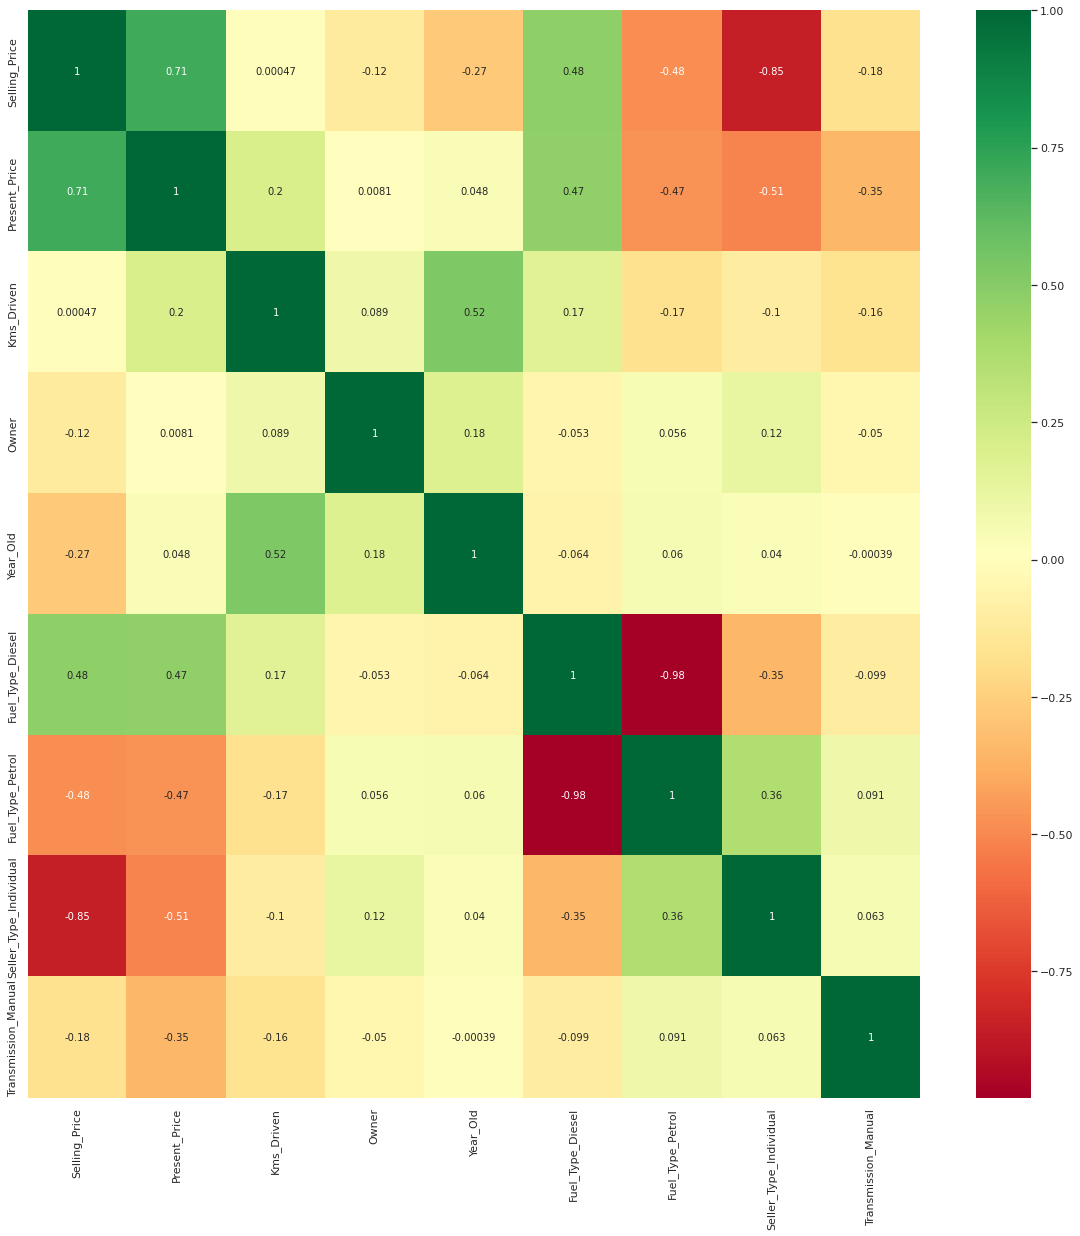

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = car_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(car_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


The Present_Price has the highest positive correlation with the target variable which makes sense.

The Year_Old has the highest negative correlation with the target variable which also makes sense. Older the car,Lower the price.

In [ ]:
X=car_data.iloc[:,1:]
y=car_data.iloc[:,0]

In [ ]:
X.head()

,Present_Price,Kms_Driven,Owner,Year_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [ ]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [ ]:
print(model.feature_importances_)

[0.18195566 0.01482832 0.00395386 0.05790153 0.02542325 0.00332019
 0.69645439 0.01616279]


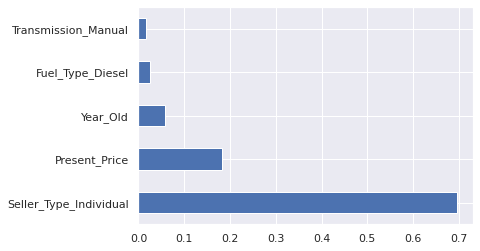

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
 #Randomized Search CV
# RandomizedSearchCV: Faster when there are many combinations of hyperparameter
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]  #100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
xgboost_model = XGBRegressor()
# Random search of parameters, using 5 fold cross validation,
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
xgb_model_tuned = RandomizedSearchCV(estimator = xgboost_model, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)
xgb_model_tuned.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
print("Random Forest Regressor- ",rf_random.best_params_)
print("XGBoost Regressor- ",xgb_model_tuned.best_params_)

Random Forest Regressor-  {'n_estimators': 700, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}
XGBoost Regressor-  {'n_estimators': 1100, 'min_samples_split': 15, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 5}


In [ ]:
print(rf_random.best_score_)
print(xgb_model_tuned.best_score_)

-0.0667885753294
-0.043111889321120096


In [ ]:
predictions_rf=rf_random.predict(X_test)
predictions_xg=xgb_model_tuned.predict(X_test)

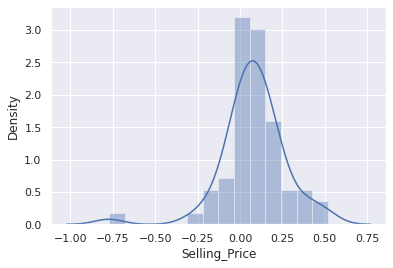

In [ ]:
sns.distplot(y_test-predictions_rf)

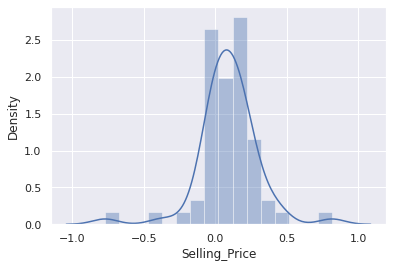

In [ ]:
sns.distplot(y_test-predictions_xg)

In [ ]:
from sklearn import metrics
print("Random Forest regressor results :- ")
print('MAE:', metrics.mean_absolute_error(y_test, predictions_rf))
print('MSE:', metrics.mean_squared_error(y_test, predictions_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_rf)))
print('R2 score:', metrics.r2_score(y_test, predictions_rf))

print("  ")
print("XGBoost results :- ")
print('MAE:', metrics.mean_absolute_error(y_test, predictions_xg))
print('MSE:', metrics.mean_squared_error(y_test, predictions_xg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_xg)))
print('R2 score:', metrics.r2_score(y_test, predictions_xg))

Random Forest regressor results :- 
MAE: 0.14803980829481433
MSE: 0.04217834015521389
RMSE: 0.20537365983790104
R2 score: 0.970605277014395
  
XGBoost results :- 
MAE: 0.15526068494883732
MSE: 0.0500498694629509
RMSE: 0.22371828146790082
R2 score: 0.9651194892232556


In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)